In [2]:
import matplotlib.pyplot as plt
import pywt
import sys
import pandas as pd

# Data format:
# Raw data should be in a .txt file with two columns, separated by tabs:
#  - The first column should be a time-series index
#  - The second column should contain the data to be filtered

# Get data:
data = pd.read_csv ("NASDAQ (1).csv")
index = data.iloc[:,0].values
Data = data.iloc[:,1].values
print(index)
print(Data)

['2012/1/3' '2012/1/4' '2012/1/5' ... '2016/12/21' '2016/12/22'
 '2016/12/23']
[2648.72 2648.36 2669.86 ... 5471.43 5447.42 5462.69]


maximum level is 3


<Figure size 432x288 with 0 Axes>

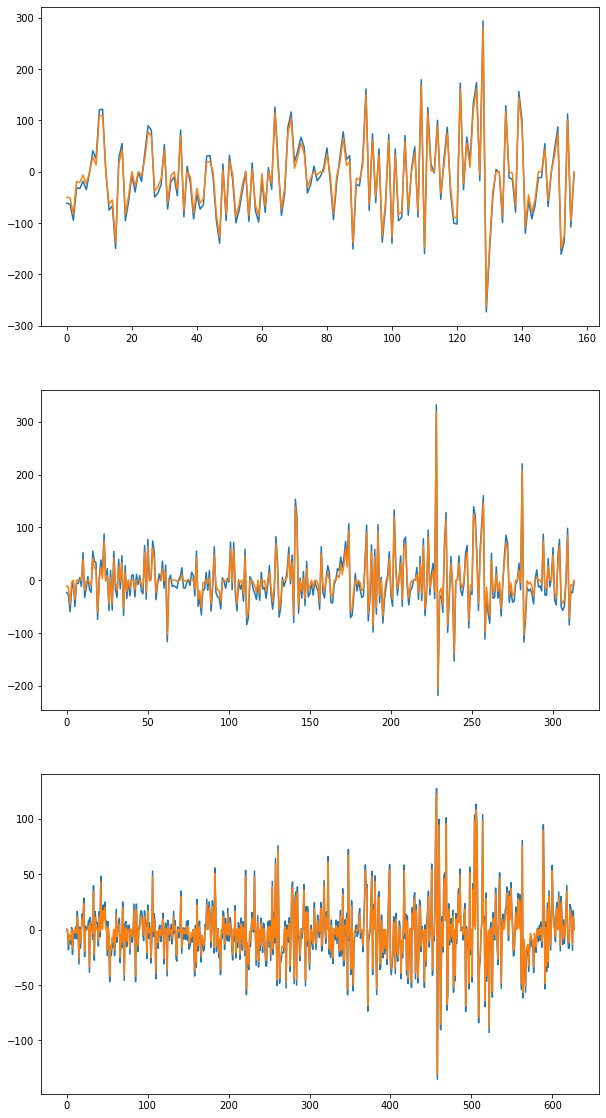

In [4]:
# Create wavelet object and define parameters
w = pywt.Wavelet('haar')
maxlev= 3
print("maximum level is " + str(maxlev))
threshold = 0.04 # Threshold for filtering

# Decompose into wavelet components, to the level selected:
coeffs = pywt.wavedec(Data, 'haar', level=maxlev)


#cA = pywt.threshold(cA, threshold*max(cA))
plt.figure()
f, axs = plt.subplots(4,4,figsize=(10,20))
for i in range(1, len(coeffs)):
    plt.subplot(maxlev, 1, i)
    plt.plot(coeffs[i])
    coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
    plt.plot(coeffs[i])


In [ ]:
datarec = pywt.waverec(coeffs, 'haar')

mintime = 100
maxtime = mintime + 100

<Figure size 432x288 with 0 Axes>

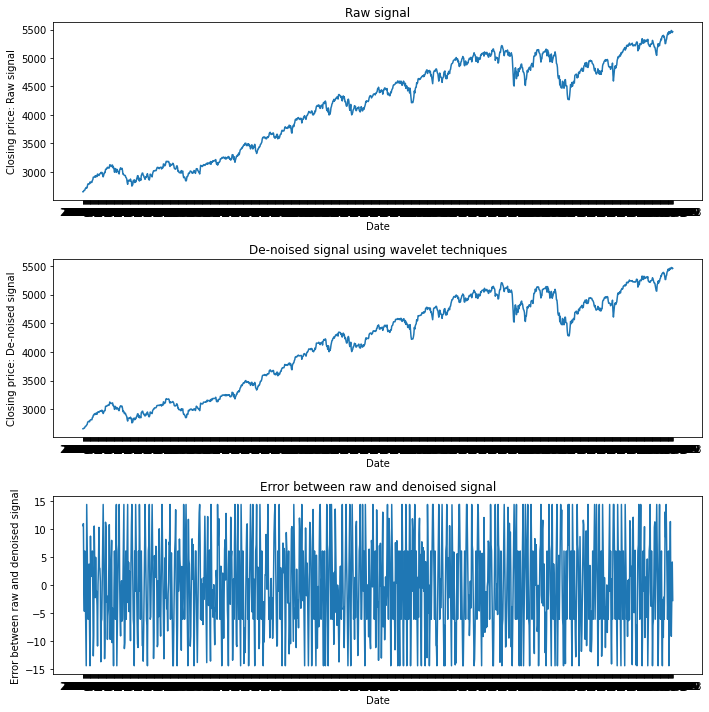

In [ ]:
plt.figure()

f, axs = plt.subplots(3,3,figsize=(10,10))

plt.subplot(3, 1, 1)
plt.plot(index, Data)
plt.xlabel('Date')
plt.ylabel('Closing price: Raw signal')
plt.title("Raw signal")
plt.subplot(3, 1, 2)
plt.plot(index, datarec[:-1])
plt.xlabel('Date')
plt.ylabel('Closing price: De-noised signal')
plt.title("De-noised signal using wavelet techniques")


plt.subplot(3,1,3)
plt.plot(index, datarec[:-1]-Data)
plt.xlabel('Date')
plt.ylabel('Error between raw and denoised signal')
plt.title("Error between raw and denoised signal")


plt.tight_layout()
plt.show()

